In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!chmod 600 /content/kaggle.json

In [7]:
import os

In [8]:
!pip install kaggle

os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d momincks/paintings-for-artistic-style-transfer

 99% 211M/213M [00:03<00:00, 98.1MB/s]
100% 213M/213M [00:03<00:00, 61.6MB/s]


In [10]:
import zipfile
file_path = "/content/paintings-for-artistic-style-transfer.zip"

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [11]:
pip install opensimplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 6.3 MB/s eta 0:00:00


In [12]:
pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.4.9
    Uninstalling imageio-ffmpeg-0.4.9:
      Successfully uninstalled imageio-ffmpeg-0.4.9


In [13]:
import pickle
import torch
import tensorflow as tf


In [14]:
import os
!pip install gdown --upgrade

if os.path.isdir("/content/drive/MyDrive/colab-sg2-ada-pytorch"):
    %cd "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch"
elif os.path.isdir("/content/drive/"):
    #install script
    %cd "/content/drive/MyDrive/"
    !mkdir colab-sg2-ada-pytorch
    %cd colab-sg2-ada-pytorch
    !git clone https://github.com/dvschultz/stylegan2-ada-pytorch
    %cd stylegan2-ada-pytorch
    !mkdir downloads
    !mkdir datasets
    !mkdir pretrained
    !gdown --id 1-5xZkD8ajXw1DdopTkH_rAoCsD72LhKU -O /content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/pretrained/wikiart.pkl
else:
    !git clone https://github.com/dvschultz/stylegan2-ada-pytorch
    %cd stylegan2-ada-pytorch
    !mkdir downloads
    !mkdir datasets
    !mkdir pretrained
    %cd pretrained
    !gdown --id 1-5xZkD8ajXw1DdopTkH_rAoCsD72LhKU
    %cd ../

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
/content/drive/MyDrive
/content/drive/MyDrive/colab-sg2-ada-pytorch
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 544, done.
remote: Total 544 (delta 0), reused 0 (delta 0), pack-reused 544
Receiving objects: 100% (544/544), 8.42 MiB | 9.45 MiB/s, done.
Resolving deltas: 100% (308/308), done.
/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gdown/download.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(l

In [15]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2024-04-04 17:28:27--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 18.238.192.41, 18.238.192.35, 18.238.192.62, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|18.238.192.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  62.1MB/s    in 6.4s    

2024-04-04 17:28:34 (56.9 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [16]:
# Generate curated MetFaces images without truncation (Fig.10 left)
!python generate.py --outdir=out --trunc=1 --seeds=85,265,297,849 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

# Generate uncurated MetFaces images with truncation (Fig.12 upper left)
!python generate.py --outdir=out --trunc=0.7 --seeds=600-605 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

# Generate class conditional CIFAR-10 images (Fig.17 left, Car)
!python generate.py --outdir=out --seeds=0-35 --class=1 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/cifar10.pkl

# Style mixing example
!python style_mixing.py --outdir=out --rows=85,100,75,458,1500 --cols=55,821,1789,293 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/generate.py:59: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  elif(len(seeds) is not 3):
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"...
Generating image for seed 85 (0/4) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/4) ...
Generating image for seed 297 (2/4) ...
Generating image for seed 849 (3/4) ...
/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/generate.py:59: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  elif(len(seeds) is not 3):
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"...
Generating image for seed 600 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 601 (1/

In [17]:
with open('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
z = torch.randn([1, G.z_dim]).cuda()    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c)                           # NCHW, float32, dynamic range [-1, +1]

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


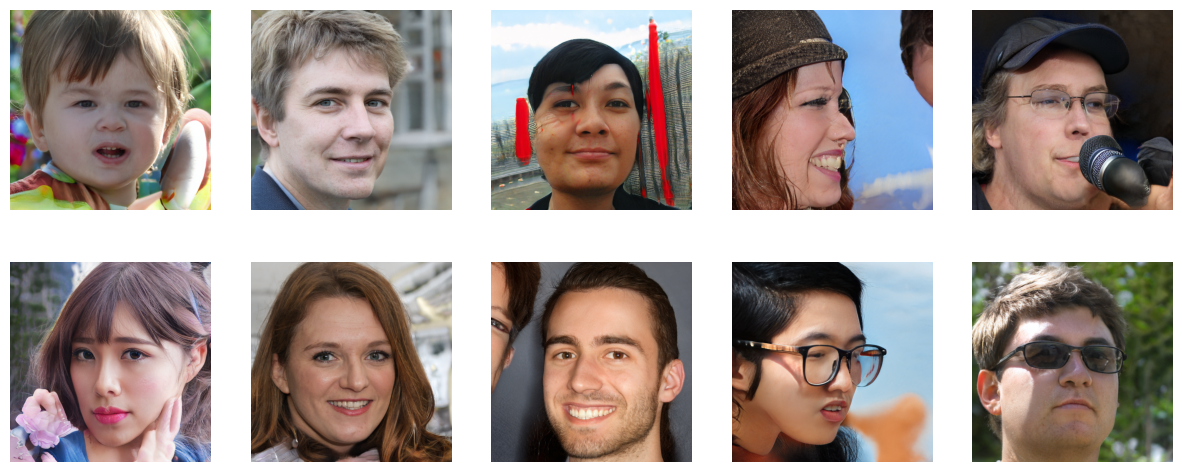

In [18]:
import torch
import pickle
import matplotlib.pyplot as plt

# Load the StyleGAN model from the pickle file
with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module

# Generate 10 random latent codes
latent_codes = torch.randn(10, G.z_dim).cuda()

# Generate images from the latent codes
generated_images = G(latent_codes, None)

# Convert the images to NumPy arrays
images_np = generated_images.detach().cpu().numpy()  # Convert to NumPy array and detach from GPU

# Rescale pixel values from [-1, 1] to [0, 1] for visualization
images_np = (images_np + 1) / 2

# Create subplots for visualizing multiple images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Display each generated image
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images_np[i].transpose(1, 2, 0))  # Transpose CHW to HWC for visualization
    ax.axis('off')

plt.show()


In [19]:
w = G.mapping(z, c, truncation_psi=0.5, truncation_cutoff=8)
img = G.synthesis(w, noise_mode='const', force_fp32=True)

In [20]:
!git clone https://github.com/NVlabs/ffhq-dataset.git

Cloning into 'ffhq-dataset'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 70 (delta 4), reused 6 (delta 2), pack-reused 60
Receiving objects: 100% (70/70), 3.88 MiB | 7.54 MiB/s, done.
fatal: premature end of pack file, 6374 bytes missing
fatal: fetch-pack: invalid index-pack output


In [ ]:
!python /content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py -r

|   0.00% done  1/2 files  0.00/0.25 GB   0.00 B/s    ETA: ...     Traceback (most recent call last):
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py", line 445, in <module>
    run_cmdline(sys.argv)
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py", line 440, in run_cmdline
    run(**vars(args))
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py", line 387, in run
    download_files([json_spec, license_specs['json']], **download_kwargs)
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py", line 205, in download_files
    raise exc_info[1].with_traceback(exc_info[2])
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq-dataset/download_ffhq.py", line 214, in _download_thread
    download_file(session, spec, stats, **download_kwargs)
  File "/c

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada.git

fatal: destination path 'stylegan2-ada' already exists and is not an empty directory.


In [ ]:
# Using dataset_tool.py from TensorFlow version at
# https://github.com/NVlabs/stylegan2-ada/
!python /content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada/dataset_tool.py unpack \
    --tfrecord_dir=~/ffhq-dataset/tfrecords/ffhq --output_dir=/tmp/ffhq-unpacked

2024-04-04 15:02:16.143103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 15:02:16.143150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 15:02:16.144452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 15:02:17.152139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada/dataset_tool.py", line 21, in <module>
    import dnnlib.tflib as tflib
  File "/content/drive/MyDrive/colab-sg2-ada-

In [21]:
pip install --upgrade imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6


In [22]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/v --target=/content/v.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.89 loss 24567.56
step    2/1000: dist 0.90 loss 27640.87
step    3/1000: dist 0.86 loss 27166.98
step    4/1000: dist 0.82 loss 26253.62
step    5/1000: dist 0.78 loss 24957.39
step    6/1000: dist 0.88 loss 23352.42
step    7/1000: dist 0.82 loss 21510.97
step    8/1000: dist 0.78 loss 19487.06
step    9/1000: dist 0.80 loss 17341.73
step   10/1000: dist 0.79 loss 15140.58
step   11/1000: dist 0.77 loss 12947.28
step   12/1000: dist 0.78 loss 10818.35
step   13/1000: dist 0.75 loss 8801.46
step   14/1000: dist 0.77 loss 6946.81
step   15/1000: dist 0.75 loss 5314.06
step   16/1000: dist 0.71 loss 3971.80
step   17/1000: dist 0.74 loss 2942.74
step   18/1000: dist 0.73 loss 2211.16
step   19/1000: dist 

In [23]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/1 --target=/content/1.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.90 loss 24567.57
step    2/1000: dist 0.91 loss 27640.88
step    3/1000: dist 0.87 loss 27166.98
step    4/1000: dist 0.81 loss 26253.61
step    5/1000: dist 0.77 loss 24957.38
step    6/1000: dist 0.89 loss 23352.43
step    7/1000: dist 0.81 loss 21510.97
step    8/1000: dist 0.77 loss 19487.05
step    9/1000: dist 0.80 loss 17341.74
step   10/1000: dist 0.78 loss 15140.57
step   11/1000: dist 0.77 loss 12947.28
step   12/1000: dist 0.78 loss 10818.35
step   13/1000: dist 0.76 loss 8801.47
step   14/1000: dist 0.77 loss 6946.81
step   15/1000: dist 0.76 loss 5314.07
step   16/1000: dist 0.71 loss 3971.80
step   17/1000: dist 0.73 loss 2942.73
step   18/1000: dist 0.70 loss 2211.13
step   19/1000: dist 

In [24]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/2 --target=/content/2.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.95 loss 24567.61
step    2/1000: dist 0.88 loss 27640.86
step    3/1000: dist 0.85 loss 27166.97
step    4/1000: dist 0.92 loss 26253.72
step    5/1000: dist 0.88 loss 24957.49
step    6/1000: dist 0.92 loss 23352.46
step    7/1000: dist 0.92 loss 21511.07
step    8/1000: dist 0.86 loss 19487.13
step    9/1000: dist 0.85 loss 17341.79
step   10/1000: dist 0.85 loss 15140.63
step   11/1000: dist 0.84 loss 12947.35
step   12/1000: dist 0.86 loss 10818.42
step   13/1000: dist 0.79 loss 8801.50
step   14/1000: dist 0.80 loss 6946.84
step   15/1000: dist 0.78 loss 5314.09
step   16/1000: dist 0.74 loss 3971.83
step   17/1000: dist 0.78 loss 2942.78
step   18/1000: dist 0.78 loss 2211.21
step   19/1000: dist 

In [25]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/3 --target=/content/3.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.86 loss 24567.52
step    2/1000: dist 0.90 loss 27640.88
step    3/1000: dist 0.85 loss 27166.97
step    4/1000: dist 0.79 loss 26253.59
step    5/1000: dist 0.77 loss 24957.38
step    6/1000: dist 0.85 loss 23352.39
step    7/1000: dist 0.79 loss 21510.95
step    8/1000: dist 0.76 loss 19487.04
step    9/1000: dist 0.79 loss 17341.73
step   10/1000: dist 0.77 loss 15140.56
step   11/1000: dist 0.74 loss 12947.25
step   12/1000: dist 0.75 loss 10818.32
step   13/1000: dist 0.74 loss 8801.45
step   14/1000: dist 0.75 loss 6946.78
step   15/1000: dist 0.74 loss 5314.04
step   16/1000: dist 0.69 loss 3971.78
step   17/1000: dist 0.72 loss 2942.72
step   18/1000: dist 0.70 loss 2211.14
step   19/1000: dist 

In [26]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/4 --target=/content/4.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.88 loss 24567.55
step    2/1000: dist 0.87 loss 27640.85
step    3/1000: dist 0.82 loss 27166.94
step    4/1000: dist 0.88 loss 26253.67
step    5/1000: dist 0.87 loss 24957.48
step    6/1000: dist 0.87 loss 23352.41
step    7/1000: dist 0.87 loss 21511.02
step    8/1000: dist 0.83 loss 19487.11
step    9/1000: dist 0.85 loss 17341.79
step   10/1000: dist 0.83 loss 15140.61
step   11/1000: dist 0.82 loss 12947.33
step   12/1000: dist 0.84 loss 10818.41
step   13/1000: dist 0.81 loss 8801.52
step   14/1000: dist 0.81 loss 6946.85
step   15/1000: dist 0.82 loss 5314.13
step   16/1000: dist 0.77 loss 3971.86
step   17/1000: dist 0.82 loss 2942.82
step   18/1000: dist 0.80 loss 2211.24
step   19/1000: dist 

In [27]:
!python projector.py --outdir=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/self --target=/content/Smruti.jpg \
    --network=/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl

Loading networks from "/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.76 loss 24567.43
step    2/1000: dist 0.81 loss 27640.78
step    3/1000: dist 0.72 loss 27166.84
step    4/1000: dist 0.76 loss 26253.55
step    5/1000: dist 0.76 loss 24957.37
step    6/1000: dist 0.76 loss 23352.29
step    7/1000: dist 0.74 loss 21510.89
step    8/1000: dist 0.73 loss 19487.00
step    9/1000: dist 0.74 loss 17341.68
step   10/1000: dist 0.73 loss 15140.51
step   11/1000: dist 0.72 loss 12947.24
step   12/1000: dist 0.74 loss 10818.31
step   13/1000: dist 0.74 loss 8801.45
step   14/1000: dist 0.72 loss 6946.75
step   15/1000: dist 0.74 loss 5314.05
step   16/1000: dist 0.71 loss 3971.80
step   17/1000: dist 0.74 loss 2942.74
step   18/1000: dist 0.70 loss 2211.14
step   19/1000: dist 

In [60]:
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Load the latent codes for the images
latent_codes = {
    'vanilla': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/self/projected_w.npz')['w']).to(device),  # Move to device
    'image1': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/1/projected_w.npz')['w']).to(device),
    'image2': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/2/projected_w.npz')['w']).to(device),
    'image3': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/3/projected_w.npz')['w']).to(device),
    'image4': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/4/projected_w.npz')['w']).to(device),
    'image5': torch.tensor(np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/v/projected_w.npz')['w']).to(device)
}

# Load the StyleGAN2 generator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].to(device)

# Set the paths for the images
image_paths = {
    'vanilla': "/content/Smruti.jpg",
    'image1': "/content/v.jpg",
    'image2': "/content/1.jpg",
    'image3': "/content/2.jpg",
    'image4': "/content/3.jpg",
    'image5': "/content/4.jpg"
}

# Load images as tensors and move to GPU
images_tensor = {name: transforms.ToTensor()(transforms.Resize((256, 256))(Image.open(path))).unsqueeze(0).to(device)
                 for name, path in image_paths.items()}

# Set the number of interpolation steps
num_steps = 10

# Move the latent codes to the same device
latent_codes = {name: latent.to(device) for name, latent in latent_codes.items()}

# Perform linear interpolation between the vanilla image and other images
def generate_images(w_codes):
    with torch.no_grad():
        w_tensors = torch.stack(w_codes)
        imgs = G.synthesis(w_tensors, noise_mode='const')
        imgs = (imgs.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
        return imgs.cpu().numpy()

for target_name, target_latent in latent_codes.items():
    if target_name == 'vanilla':
        continue

    interpolated_ws = [torch.lerp(latent_codes['vanilla'], target_latent, t) for t in torch.linspace(0, 1, num_steps + 1)]

    interpolated_images = generate_images(interpolated_ws)

    # Display the interpolated images
    fig, axs = plt.subplots(1, num_steps + 1, figsize=(20, 5))
    for j, ax in enumerate(axs.flat):
        ax.imshow(interpolated_images[j])
        ax.axis('off')
        ax.set_title(f'Step {j}')
    plt.suptitle(f'Interpolation between vanilla image and {target_name}')
    plt.show()
    print('\n')


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [29]:
import numpy as np

# Load the latent codes for the vanilla image
vanilla_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/self/projected_w.npz')['w']

# Load the latent codes for the other images
image1_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/1/projected_w.npz')['w']
image2_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/2/projected_w.npz')['w']
image3_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/3/projected_w.npz')['w']
image4_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/4/projected_w.npz')['w']
image5_latent = np.load('/content/drive/MyDrive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/output/v/projected_w.npz')['w']